<a href="https://colab.research.google.com/github/dansarmiento/ColaboratoryNotebooks/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to review linear regression using pandas and seaborn

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# penguins is one of the example datasets that comes with seaborn
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**Data cleaning**

This analysis will focus on a subset of penguins, the adelie and gentoo, so we will filter for those values and clean up the data by dropping rows with missing values

In [3]:
# filtering for two of the three unique species means that we can filter everything that isn't the third
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
# filter for the two species
df = df[df.species != 'Chinstrap']
# drop rows with missing values and reset the index after cleaning up the bad rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


**Exploratory analysis with seaborn**

The purpose of exploring the data is to evaluate the size and spread of the data and to look for outliers

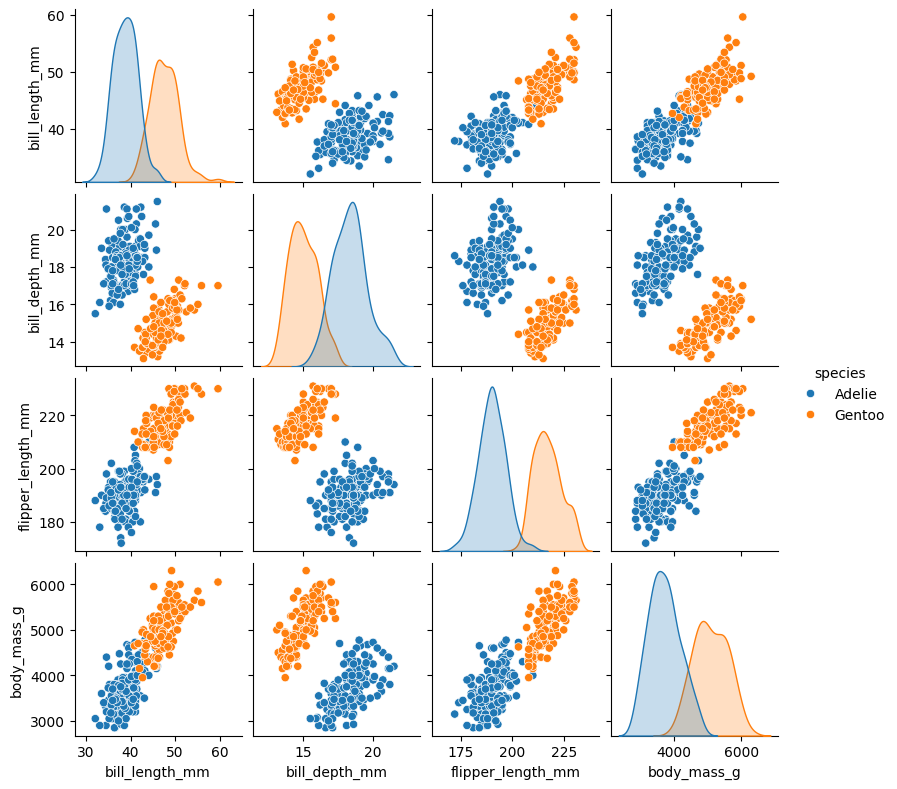

In [9]:
sns.pairplot(df, hue='species', height=2)

From this pairplot, a few linear relationships can be observed:

- bill length X flipper length
- bill length X body mass
- flipper length x body mass

**Ordinary Least Squares**

here we will build a model to evaluate the linear relationship using statsmodels ols module

the format of this module is to isolate the columns with the linear relationship and to pass those column headers into a formula string before fitting the model to the data

In [14]:
from statsmodels.formula.api import ols

ols_data = df[['bill_length_mm','body_mass_g']]
ols_formula = 'body_mass_g ~ bill_length_mm'
ols_model = ols(formula=ols_formula, data=ols_data)
ols_results = ols_model.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.33e-85
Time:                        17:28:57   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary explanation**
Model Info
Dep. Variable: body_mass_g
→ This is what you're trying to predict (dependent variable).

Model: OLS
→ Ordinary Least Squares is the method used for fitting the linear regression.

Method: Least Squares
→ Confirms that it used OLS, which minimizes the squared differences between actual and predicted values.

Date / Time:
→ When the model was fit—just metadata.

Model Fit Statistics
R-squared: 0.769
→ About 77% of the variance in body mass is explained by bill length. Higher is better (max = 1.0).

Adj. R-squared: 0.768
→ Adjusted for the number of predictors. Useful when comparing models with different numbers of predictors.

F-statistic: 874.3
→ Tests whether your model provides a better fit than a model with no predictors. Bigger = better.

Prob (F-statistic): 1.33e-85
→ Very small, meaning it's extremely unlikely this model fit is due to chance. Very significant.

Log-Likelihood: -1965.8
→ Used for comparing models (not very interpretable alone). Higher is better.

AIC / BIC: 3936.6 / 3943.0
→ Penalized scores for model complexity. Lower is better. Useful for comparing models.

Data Shape
No. Observations: 265
→ You have 265 rows (data points).

Df Residuals: 263
→ Degrees of freedom = number of data points minus number of parameters estimated.

Df Model: 1
→ You have 1 predictor variable (bill length).

Coefficients
| Variable | Coef | P>|t| | 95% CI |
|------------------|----------|----------|--------------------------|
| Intercept | -1707.29 | 0.000 | [-2112.20, -1302.38] |
| bill_length_mm | 141.19 | 0.000 | [131.79, 150.59] |

coef:

The intercept is where the line crosses the y-axis (i.e., predicted body mass when bill length = 0).

The slope (bill_length_mm) means for each additional mm of bill length, body mass increases by ~141g.

std err: Standard error of the coefficient estimates.

t & P>|t|:

t is the t-statistic (estimate / std err),

P>|t| is the p-value: both are very significant (p < 0.001), meaning strong evidence that bill_length_mm affects body_mass_g.

[0.025, 0.975]:

95% Confidence Interval for each coefficient.

Diagnostic Tests
Omnibus: 2.060

Prob(Omnibus): 0.357
→ Tests for normality of residuals. Not significant (which is good).

Skew: 0.210
→ Indicates slight asymmetry in the residuals. Close to 0 is ideal.

Kurtosis: 2.882
→ Measures "tailedness" of the residuals. 3 is ideal for a normal distribution.

Durbin-Watson: 2.067
→ Tests for autocorrelation in residuals. Around 2 is ideal (no autocorrelation).

Jarque-Bera (JB): 2.103 / Prob(JB): 0.349
→ Another test for normality. Again, not significant → residuals look fine.

Cond. No.: 357
→ Tests multicollinearity and numerical stability. Values > 30 can be a concern, but since you only have 1 variable, it's not alarming here.

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

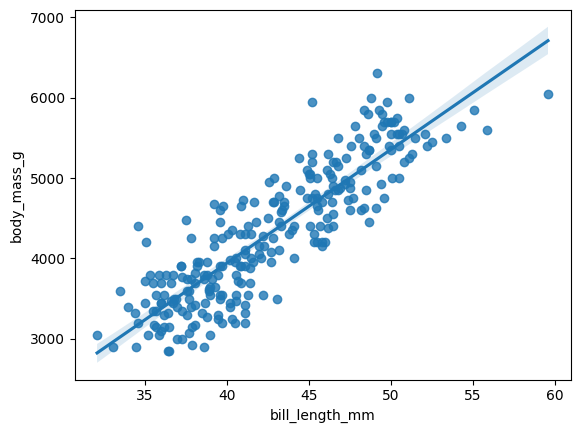

In [15]:
# we can also use a regplot to visualize the regression line with the data
sns.regplot(x='bill_length_mm', y='body_mass_g', data=ols_data)

**Linear Regression Assumptions**

- Linearity
- Normality
- Independent observations
- Homomscedasticity

linearity was checked with the pairplot, independent observations we have to assume but it is reasonable to think that one penguin's measurements are independent from another's.

Normality and homoscedastiicity are related to the distribution of errors, so we have to check after building the model

In [16]:
# here we isolate the independent variable, predict the dependent variable using the model and save the residuals to a variable
X = ols_data['bill_length_mm']
fitted_values = ols_results.predict(X)
residuals = ols_results.resid

**Checking for normality with matplotlib**

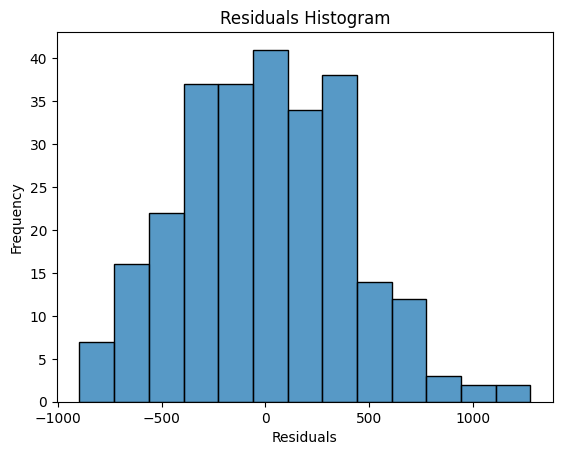

In [18]:
import matplotlib.pyplot as plt

fig = sns.histplot(residuals)
fig.set_xlabel('Residuals')
fig.set_ylabel('Frequency')
fig.set_title('Residuals Histogram')
plt.show()

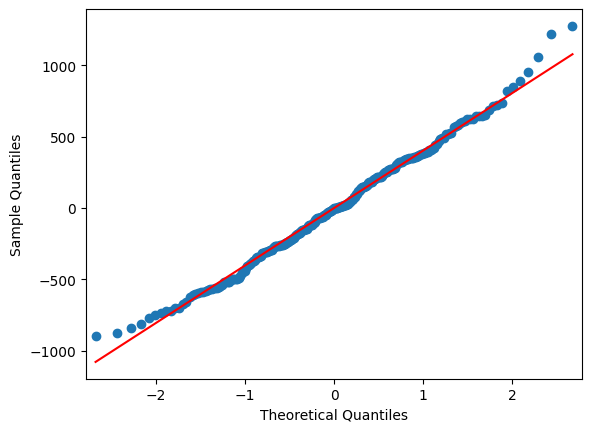

In [19]:
# another way to check normality is with the Quantile-Quantile or QQ plot.  if residuals are normally distributed, you would expect a diagonal line from bottom left to top right

import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.show()

**Homoscedasticity**

This assumption is that the residuals are scattered randomly and this can be checked with a scatterplot that includes a line at 0

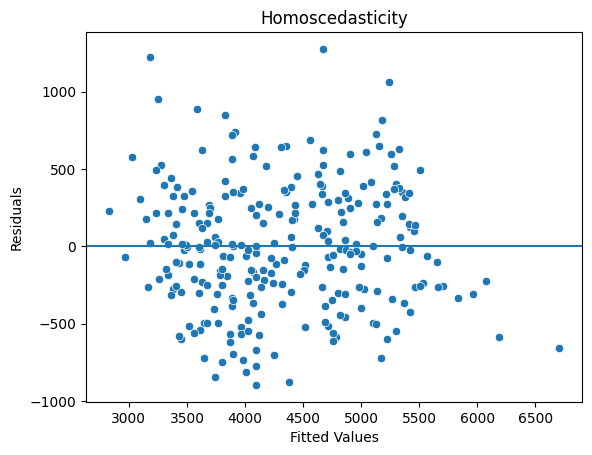

In [21]:
fig = sns.scatterplot(x=fitted_values, y=residuals)

fig.axhline(0)

fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Homoscedasticity')
plt.show()